# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [1]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [2]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter)
filterResponseSobelX = signal.convolve2d(image,sobelX )
filterResponseSobelY = signal.convolve2d(image,sobelY )

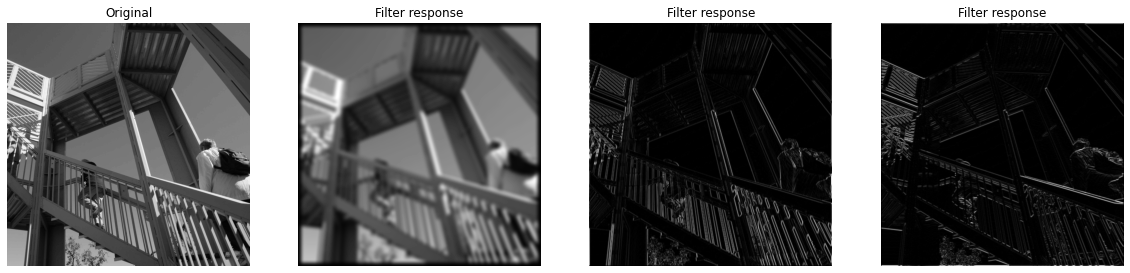

In [3]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

**Answer:** 

- Gaussian filter blurs the image.
- SobelX filter detects horizontal edges 
- SobelY filter detects vertical edges 

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?
**Answer**
- a) size of image is (512, 512)

- b) number of channels is 1 since `len(img.shape)` returns two, so the image has a single channel.Furthure, the image is in grey scale and a grayscale image has just one channel.

- c)number of image in color image : a color image normally has three channels: red, green, and blue.

Question 3: What is the size of the different filters?

**Answer**

Gaussion filter size is (15,15) and SlobeX and SobelY filter is (3,3).

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?
**Answer**

    - The output is the same size as the first inpute i.e.`image` (512,512).
    
Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

**Answer**
filter response will be (Nf - 1) pixels smaller. for Gaussian filter it will be:

$(512-15+1=498,512-15+1=498)$ 

and for the SobelX and SobelY $(512-3+1=510,510)$


Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?  

**Answer**
In mode 'valid' there is  no padding to the images, as a result that the images will become smaller in every layer and if we have many layers the size of the images will be even smaller than the size of the filter and eventually we will ran out of pixel.


In [4]:
#size of image
image.shape
# number of channel
len(image.shape)

2

In [5]:
# Your code for checking sizes of image and filter responses
print("size of the image")
print(image.shape)
print("In same mode: ")
print(filterResponseGauss.shape)
print(filterResponseSobelX.shape)
print(filterResponseSobelY.shape)
print("In valid mode:")
filterResponseGauss2 = signal.convolve2d(image, gaussFilter, boundary='symm', mode='valid')
print(filterResponseGauss2.shape)
filterResponseSobelX = signal.convolve2d(image,sobelX ,mode='valid')
print(filterResponseSobelX.shape )
filterResponseSobelY = signal.convolve2d(image,sobelY ,mode='valid')
print(filterResponseSobelY.shape )


size of the image
(512, 512)
In same mode: 
(526, 526)
(514, 514)
(514, 514)
In valid mode:
(498, 498)
(510, 510)
(510, 510)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [1]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf

import  tensorflow.keras.backend as K

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters of size 7 x 7 x 3, and not 7 x 7 ? 

**Answer**
The 3rd dimension is for the number of channels (RGB)

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

**Answer**
Most Ml framework performs cross correlation instead of standard 2D convolution.
Lets investigate how much faster a convolution is with the graphics card (skip this part if you run on a CPU)

Question 9: How much faster is the graphics card, compared to the CPU, for convolving a batch of 100 images?
6x
Question 10: How much faster is the graphics card, compared to the CPU, for convolving a batch of 2 images? Explain the difference compared to 100 images.

In [8]:
# Run this cell to compare processing time of CPU and GPU

import timeit

n_images_in_batch = 100

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

# Perform convolutions using the CPU
def cpu():
  with tf.device('/cpu:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_cpu)

# Perform convolutions using the GPU (graphics card)
def gpu():
  with tf.device('/device:GPU:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the convolution several times and measure the time
print('Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3'
      ' (batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3 (batch x height x width x channel). Sum of ten runs.
CPU (s):
1.1167418109999971
GPU (s):
0.1825127509999902
GPU speedup over CPU: 6x


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [9]:
from tensorflow.keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

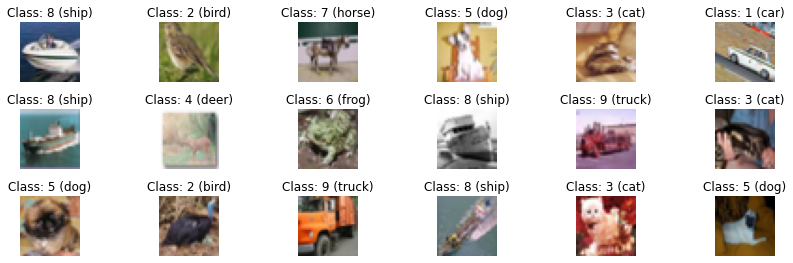

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ytrain, Yval= train_test_split(Xtrain,Ytrain, test_size=0.25)


# Print the size of training data, validation data and test data
print("Size of XTrain {}".format(Xtrain.shape))
print("Size of YTrain {}".format(Ytrain.shape))
print("Size of XVal {}".format(Xval.shape))
print("Size of YVal  {}".format(Yval.shape))
print("Size of Xtest {}". format(Xtest.shape))
print("Size of Ytest {}". format(Ytest.shape))


Size of XTrain (7500, 32, 32, 3)
Size of YTrain (7500, 1)
Size of XVal (2500, 32, 32, 3)
Size of YVal  (2500, 1)
Size of Xtest (2000, 32, 32, 3)
Size of Ytest (2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [12]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [13]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print('Ytrain shape before converting : {}'.format(Ytrain.shape))
print('Yval shape before converting : {}'.format(Yval.shape))
print('Ytest shape before converting : {}'.format(Ytest.shape))


# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain)
Yval = to_categorical(Yval)
Ytest = to_categorical(Ytest)

# Print shapes after converting the labels
print('Ytrain shape after converting : {}'.format(Ytrain.shape))
print('Yval shape after converting : {}'.format(Yval.shape))
print('Ytest shape after converting : {}'.format(Ytest.shape))


Ytrain shape before converting : (7500, 1)
Yval shape before converting : (2500, 1)
Ytest shape before converting : (2000, 1)
Ytrain shape after converting : (7500, 10)
Yval shape after converting : (2500, 10)
Ytest shape after converting : (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import  categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()
    
    # Add first convolutional layer to the model, requires input shape
    
    model.add(Conv2D(filters=n_filters, kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        n_filters= 2*n_filters
        model.add(Conv2D(filters=n_filters,kernel_size=(3,3),padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size =(2,2),padding='same'))
    # Add flatten layer
    model.add(Flatten())

    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation='relu'))
        model.add(BatchNormalization())
        if use_dropout == True:
            model.add(Dropout(rate=0.5))
        
    # Add final dense layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= Adam(lr = learning_rate),metrics=['accuracy'])

    return model

In [2]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [16]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model1 = build_CNN(input_shape=input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)


# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,Ytrain, batch_size=batch_size, verbose=2, validation_data=(Xval,Yval), epochs=epochs)

Epoch 1/20
75/75 - 1s - loss: 2.9309 - accuracy: 0.3211 - val_loss: 2.1026 - val_accuracy: 0.2776
Epoch 2/20
75/75 - 1s - loss: 1.6135 - accuracy: 0.4613 - val_loss: 1.8700 - val_accuracy: 0.3556
Epoch 3/20
75/75 - 1s - loss: 1.2407 - accuracy: 0.5593 - val_loss: 1.5679 - val_accuracy: 0.4236
Epoch 4/20
75/75 - 1s - loss: 1.1025 - accuracy: 0.6127 - val_loss: 1.3747 - val_accuracy: 0.5012
Epoch 5/20
75/75 - 1s - loss: 0.9988 - accuracy: 0.6448 - val_loss: 1.5873 - val_accuracy: 0.4844
Epoch 6/20
75/75 - 1s - loss: 0.9253 - accuracy: 0.6732 - val_loss: 1.3025 - val_accuracy: 0.5456
Epoch 7/20
75/75 - 1s - loss: 0.8282 - accuracy: 0.7113 - val_loss: 1.4132 - val_accuracy: 0.5588
Epoch 8/20
75/75 - 1s - loss: 0.7520 - accuracy: 0.7364 - val_loss: 1.4538 - val_accuracy: 0.5548
Epoch 9/20
75/75 - 1s - loss: 0.6819 - accuracy: 0.7664 - val_loss: 1.5521 - val_accuracy: 0.5380
Epoch 10/20
75/75 - 1s - loss: 0.6289 - accuracy: 0.7764 - val_loss: 1.7033 - val_accuracy: 0.5380
Epoch 11/20
75/75 -

In [18]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 3ms/step - loss: 2.7464 - accuracy: 0.5310
Test loss: 2.7464
Test accuracy: 0.5310


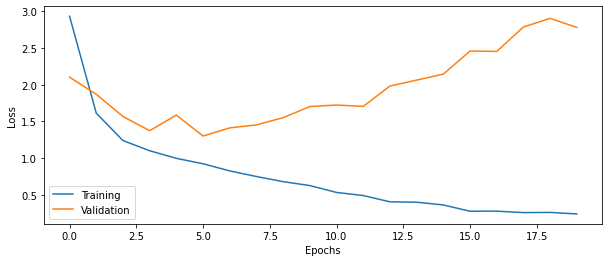

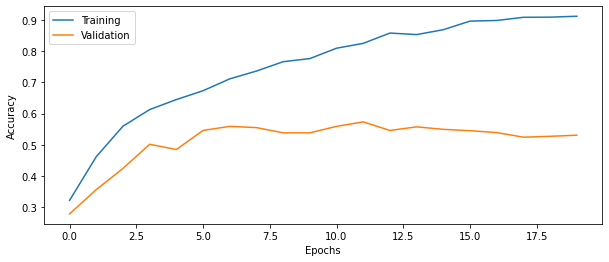

In [19]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Skip question 12 if you run on a CPU

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 
 
 **Answer**
The accuracy on test set is about 54%, meaning we are categorizing wrongfully half the time. This is not ideal.
Question 11: How big is the difference between training and test accuracy?

In training we have the accuracy of almost 92% while in test the accuracy is 54%. the difference is 38%.

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'watch nvidia-smi' on the cloud computer during training. 

 **Answer**
running 'watch nvidia-smi' on my local machine. Gpu was busy 76%.

Question 13: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

 **Answer** 
 
    - here the size of training data is 7500. batchsize should be smaller than the size of traing data.Moreover, our input data is an image and has the shape of (32*32*3)=3072. So we are feeding a large amount of data per each input to the CNN network.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [20]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]


# Build model
model2 = build_CNN(input_shape=input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)


# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size)


Epoch 1/20
75/75 [==============================] - 1s 10ms/step - loss: 1.6654 - accuracy: 0.4039 - val_loss: 1.9676 - val_accuracy: 0.3016
Epoch 2/20
75/75 [==============================] - 1s 9ms/step - loss: 1.2760 - accuracy: 0.5416 - val_loss: 2.3171 - val_accuracy: 0.2600
Epoch 3/20
75/75 [==============================] - 1s 8ms/step - loss: 1.0833 - accuracy: 0.6131 - val_loss: 1.7748 - val_accuracy: 0.3968
Epoch 4/20
75/75 [==============================] - 1s 9ms/step - loss: 0.8954 - accuracy: 0.6791 - val_loss: 1.5683 - val_accuracy: 0.4920
Epoch 5/20
75/75 [==============================] - 1s 9ms/step - loss: 0.7196 - accuracy: 0.7504 - val_loss: 1.4906 - val_accuracy: 0.5284
Epoch 6/20
75/75 [==============================] - 1s 8ms/step - loss: 0.5534 - accuracy: 0.8067 - val_loss: 1.7048 - val_accuracy: 0.5392
Epoch 7/20
75/75 [==============================] - 1s 9ms/step - loss: 0.4261 - accuracy: 0.8497 - val_loss: 2.0793 - val_accuracy: 0.5208
Epoch 8/20
75/75 [=

In [21]:
# Evaluate the trained model on test set, not used in training or validation
score =  model2.evaluate(Xtest, Ytest, batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 0s 3ms/step - loss: 3.2049 - accuracy: 0.5515
Test loss: 3.2049
Test accuracy: 0.5515


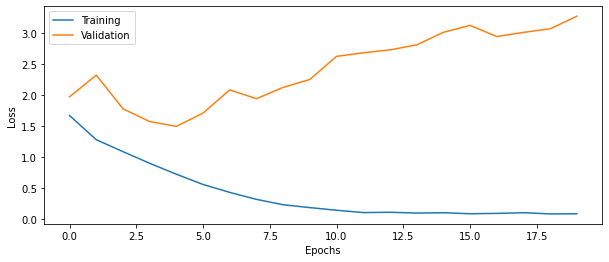

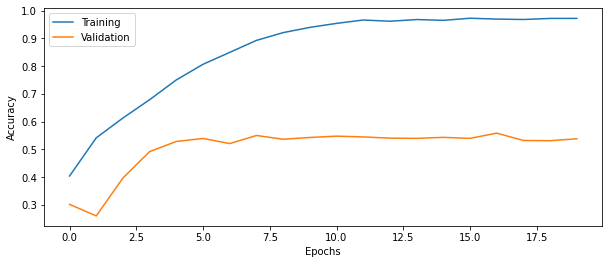

In [22]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [23]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]


# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 1s 13ms/step - loss: 1.7273 - accuracy: 0.3775 - val_loss: 1.7280 - val_accuracy: 0.3732
Epoch 2/20
75/75 [==============================] - 1s 11ms/step - loss: 1.3684 - accuracy: 0.4969 - val_loss: 1.7205 - val_accuracy: 0.3816
Epoch 3/20
75/75 [==============================] - 1s 12ms/step - loss: 1.1790 - accuracy: 0.5735 - val_loss: 1.5085 - val_accuracy: 0.4864
Epoch 4/20
75/75 [==============================] - 1s 11ms/step - loss: 1.0227 - accuracy: 0.6269 - val_loss: 1.2747 - val_accuracy: 0.5612
Epoch 5/20
75/75 [==============================] - 1s 11ms/step - loss: 0.8735 - accuracy: 0.6892 - val_loss: 1.6601 - val_accuracy: 0.5160
Epoch 6/20
75/75 [==============================] - 1s 11ms/step - loss: 0.7285 - accuracy: 0.7412 - val_loss: 1.7291 - val_accuracy: 0.5284
Epoch 7/20
75/75 [==============================] - 1s 11ms/step - loss: 0.5936 - accuracy: 0.7863 - val_loss: 1.7485 - val_accuracy: 0.5576
Epoch 8/20
75

In [24]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest, batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 0s 4ms/step - loss: 2.4820 - accuracy: 0.5865
Test loss: 2.4820
Test accuracy: 0.5865


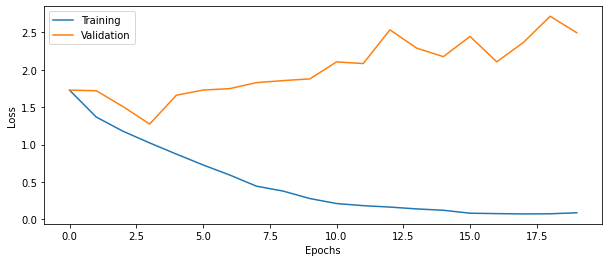

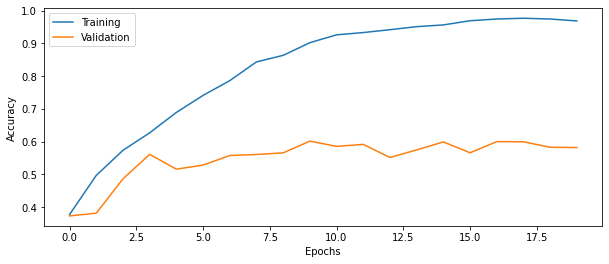

In [25]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 14: How many trainable parameters does your network have? Which part of the network contains most of the parameters?
**Answer:**

124,180.

conv2d_33 (Conv2D), the forth Convolution layer has  most of the parameters.

Question 15: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

**Answer:**

the input to and output of a Conv2D layer is a 4D tensor.
Input shape

4D tensor with shape: (batch_shape ,channels, rows, cols) here for the first CNN layer input : (100,3,32,32).

Output Shape


4D tensor with shape: (batch_shape ,filters, new_rows, new_cols) here here for the first CNN layer output (100,32,32,16)



Question 16: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

**Answer:**

Yes. accorrding to https://keras.io/layers/convolutional/

Input shape

`4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.`

Question 17: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

**Answer:**

128 channels.

Question 18: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)? becauese we have to take account the Number of Channels as well, to be more precise:


`number_parameters = out_channels * (in_channels * filter_hight * filter_width + 1)  # 1 for bias`


Question 19: How does MaxPooling help in reducing the number of parameters to train? 

**Answer**
MaxPooling layer takes the maximum value of pixel in its  neighborhood  after the CNN layer is applied. For example, if the size of the max-pooling filter is (8X8) then for each 8X8 area of pixel in the image it chooses the maximum value of pixels. So in away max-pooling summerize and reduces the dimension of the image and as a result of this dimensionality reduction the number of trainable parameter reduces.

In [26]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 64)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.


Question 20: How much did the test accuracy improve with dropout, compared to without dropout?


**Answer:**
The model with dropout did not improve compare to the 3rd model.

Question 21: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?

**Answer:**
Beside dropout we can add L1 regularization and L2 regularization.I
in Keras we can use `f.keras.regularizers.l2` with a penalty factor in the conv2D function.



## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [27]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model4 = build_CNN(input_shape=input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 1s 13ms/step - loss: 2.0080 - accuracy: 0.2867 - val_loss: 1.8457 - val_accuracy: 0.3376
Epoch 2/20
75/75 [==============================] - 1s 11ms/step - loss: 1.6145 - accuracy: 0.3885 - val_loss: 1.8588 - val_accuracy: 0.3284
Epoch 3/20
75/75 [==============================] - 1s 11ms/step - loss: 1.4857 - accuracy: 0.4484 - val_loss: 1.5830 - val_accuracy: 0.4160
Epoch 4/20
75/75 [==============================] - 1s 11ms/step - loss: 1.3552 - accuracy: 0.5017 - val_loss: 1.4302 - val_accuracy: 0.4844
Epoch 5/20
75/75 [==============================] - 1s 11ms/step - loss: 1.2350 - accuracy: 0.5460 - val_loss: 1.3329 - val_accuracy: 0.5252
Epoch 6/20
75/75 [==============================] - 1s 11ms/step - loss: 1.1367 - accuracy: 0.5851 - val_loss: 1.3047 - val_accuracy: 0.5372
Epoch 7/20
75/75 [==============================] - 1s 11ms/step - loss: 1.0428 - accuracy: 0.6320 - val_loss: 1.2570 - val_accuracy: 0.5664
Epoch 8/20
75

In [28]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 4ms/step - loss: 1.9549 - accuracy: 0.6100
Test loss: 1.9549
Test accuracy: 0.6100


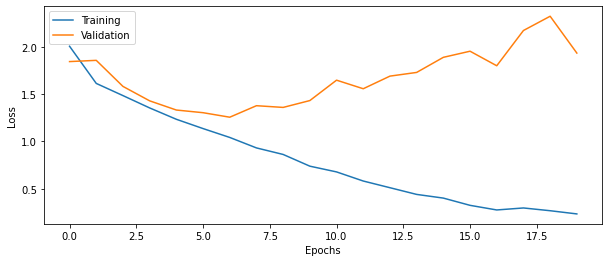

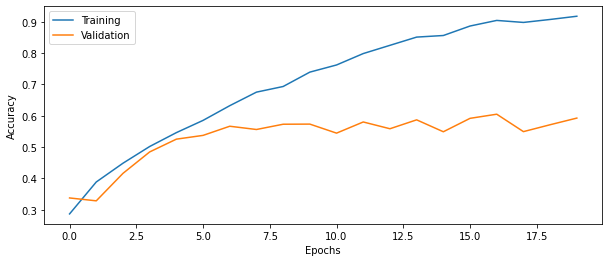

In [29]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 22: How high test accuracy can you obtain? What is your best configuration?

## Your best config

In [45]:
# Setup some training parameters
batch_size = 128
epochs = 80
input_shape = Xtrain.shape[1:4]


# Build model
model5 = build_CNN(input_shape, n_conv_layers=6, n_filters=32, n_dense_layers=10, n_nodes=20, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size)

Epoch 1/80
59/59 [==============================] - 4s 63ms/step - loss: 2.2552 - accuracy: 0.1692 - val_loss: 21.5157 - val_accuracy: 0.1084
Epoch 2/80
59/59 [==============================] - 3s 58ms/step - loss: 1.9985 - accuracy: 0.2325 - val_loss: 5.6892 - val_accuracy: 0.1336
Epoch 3/80
59/59 [==============================] - 3s 58ms/step - loss: 1.8597 - accuracy: 0.2864 - val_loss: 5.0117 - val_accuracy: 0.1900
Epoch 4/80
59/59 [==============================] - 3s 58ms/step - loss: 1.7483 - accuracy: 0.3237 - val_loss: 3.1649 - val_accuracy: 0.2024
Epoch 5/80
59/59 [==============================] - 3s 58ms/step - loss: 1.6631 - accuracy: 0.3556 - val_loss: 2.6261 - val_accuracy: 0.2564
Epoch 6/80
59/59 [==============================] - 4s 61ms/step - loss: 1.5870 - accuracy: 0.4008 - val_loss: 2.3576 - val_accuracy: 0.2976
Epoch 7/80
59/59 [==============================] - 4s 60ms/step - loss: 1.5564 - accuracy: 0.4072 - val_loss: 2.0012 - val_accuracy: 0.3544
Epoch 8/80
5

Epoch 59/80
59/59 [==============================] - 3s 52ms/step - loss: 0.0786 - accuracy: 0.9776 - val_loss: 2.4906 - val_accuracy: 0.6056
Epoch 60/80
59/59 [==============================] - 3s 52ms/step - loss: 0.0621 - accuracy: 0.9820 - val_loss: 2.4562 - val_accuracy: 0.5808
Epoch 61/80
59/59 [==============================] - 3s 53ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 2.2460 - val_accuracy: 0.6128
Epoch 62/80
59/59 [==============================] - 3s 52ms/step - loss: 0.1029 - accuracy: 0.9728 - val_loss: 2.2779 - val_accuracy: 0.6156
Epoch 63/80
59/59 [==============================] - 3s 52ms/step - loss: 0.0569 - accuracy: 0.9827 - val_loss: 2.3767 - val_accuracy: 0.6152
Epoch 64/80
59/59 [==============================] - 3s 52ms/step - loss: 0.0728 - accuracy: 0.9784 - val_loss: 2.5346 - val_accuracy: 0.5988
Epoch 65/80
59/59 [==============================] - 3s 52ms/step - loss: 0.0764 - accuracy: 0.9787 - val_loss: 2.2915 - val_accuracy: 0.6168
Epoch 

In [46]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

16/16 [==============================] - 0s 25ms/step - loss: 2.5184 - accuracy: 0.5950
Test loss: 2.5184
Test accuracy: 0.5950


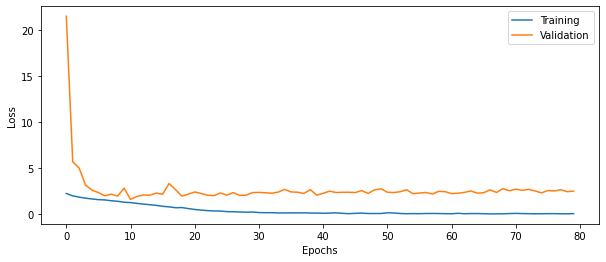

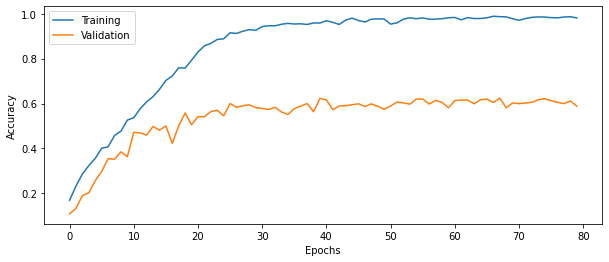

In [47]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 23: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

In [48]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

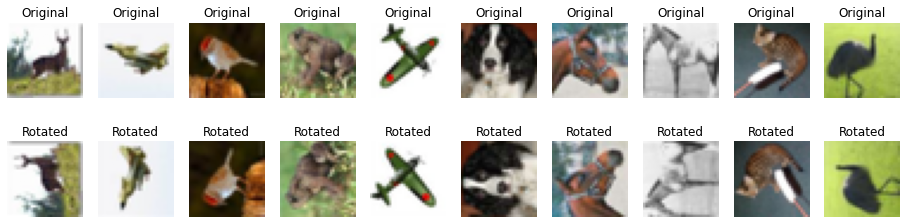

In [49]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [50]:
# Evaluate the trained model on rotated test set
score =  model5.evaluate(Xtest_rotated,Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

16/16 [==============================] - 0s 13ms/step - loss: 6.6663 - accuracy: 0.1790
Test loss: 6.6663
Test accuracy: 0.1790


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://keras.io/preprocessing/image/ , the `flow` method should be used

Do *NOT* use use_multiprocessing=True here, as it can cause strange errors.

In [51]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [57]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(validation_split=0.2,rotation_range=30,horizontal_flip=True,vertical_flip=True)


# Setup a flow for training data, assume that we can fit all images into CPU memory
trainGen = datagen.flow(x = Xtrain,y=Ytrain)

# Setup a flow for validation data, assume that we can fit all images into CPU memory

validGen = datagen.flow(x = Xval,y=Yval,shuffle=True)

## Part 18: What about big data?

Question 24: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

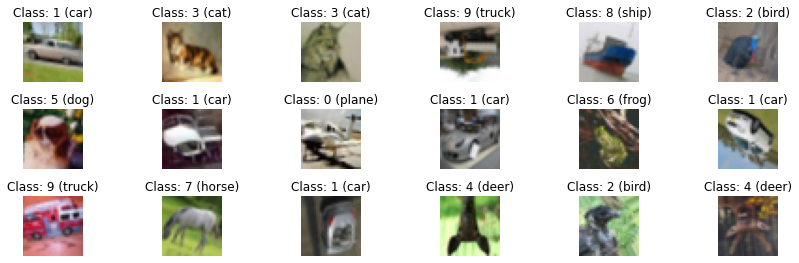

In [58]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 25: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

**Answer**
In the model5( model without generator) the training accuracy increases faster. model6 contains different variation  of the same image in the input as a result it takes more time for it to achive accuracy.To increase the performing training we can increase the batch size , decrease the learning rate or increase the number of epochs.

Question 26: What other types of image augmentation can be applied, compared to what we use here?

**Answer**
Flipping,Color space,Cropping,Translation,Noise injection,Color space transformations.

In [67]:

# Setup some training parameters
batch_size = 128
epochs = 200
input_shape = Xtrain.shape[1:4]


# Build model (your best config)
model6 = build_CNN(input_shape, n_conv_layers=6, n_filters=32, n_dense_layers=10, n_nodes=20, use_dropout=False, learning_rate=0.01)


validation_split=0.2
    
# Train the model using on the fly augmentation
history6 =   model6.fit_generator(trainGen, steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size, validation_data=validGen,
                                validation_steps=len(Xtrain)*validation_split/batch_size, epochs=epochs)

Epoch 1/200
63/62 [==============================] - 3s 42ms/step - loss: 2.3802 - accuracy: 0.1339 - val_loss: 2.6517 - val_accuracy: 0.1191
Epoch 2/200
63/62 [==============================] - 2s 38ms/step - loss: 2.2172 - accuracy: 0.1652 - val_loss: 2.4091 - val_accuracy: 0.1484
Epoch 3/200
63/62 [==============================] - 2s 39ms/step - loss: 2.1535 - accuracy: 0.1920 - val_loss: 2.5751 - val_accuracy: 0.1406
Epoch 4/200
63/62 [==============================] - 2s 38ms/step - loss: 2.1262 - accuracy: 0.2083 - val_loss: 2.7571 - val_accuracy: 0.1523
Epoch 5/200
63/62 [==============================] - 2s 38ms/step - loss: 2.1201 - accuracy: 0.2115 - val_loss: 2.1680 - val_accuracy: 0.2090
Epoch 6/200
63/62 [==============================] - 2s 39ms/step - loss: 2.0827 - accuracy: 0.1994 - val_loss: 2.1295 - val_accuracy: 0.1992
Epoch 7/200
63/62 [==============================] - 3s 40ms/step - loss: 2.0671 - accuracy: 0.2222 - val_loss: 2.1301 - val_accuracy: 0.2344
Epoch 

63/62 [==============================] - 2s 38ms/step - loss: 1.5534 - accuracy: 0.4231 - val_loss: 1.4600 - val_accuracy: 0.4531
Epoch 116/200
63/62 [==============================] - 2s 37ms/step - loss: 1.5627 - accuracy: 0.4167 - val_loss: 1.6802 - val_accuracy: 0.3281
Epoch 117/200
63/62 [==============================] - 2s 38ms/step - loss: 1.6180 - accuracy: 0.3929 - val_loss: 1.6023 - val_accuracy: 0.4082
Epoch 118/200
63/62 [==============================] - 2s 38ms/step - loss: 1.5900 - accuracy: 0.4075 - val_loss: 1.7368 - val_accuracy: 0.4062
Epoch 119/200
63/62 [==============================] - 2s 39ms/step - loss: 1.5712 - accuracy: 0.4226 - val_loss: 1.8451 - val_accuracy: 0.3398
Epoch 120/200
63/62 [==============================] - 2s 37ms/step - loss: 1.5159 - accuracy: 0.4549 - val_loss: 1.7728 - val_accuracy: 0.3809
Epoch 121/200
63/62 [==============================] - 2s 37ms/step - loss: 1.5058 - accuracy: 0.4494 - val_loss: 2.6254 - val_accuracy: 0.2305
Epoch 

Epoch 172/200
63/62 [==============================] - 2s 39ms/step - loss: 1.2861 - accuracy: 0.5367 - val_loss: 1.2794 - val_accuracy: 0.5508
Epoch 173/200
63/62 [==============================] - 2s 39ms/step - loss: 1.2713 - accuracy: 0.5585 - val_loss: 1.3207 - val_accuracy: 0.5312
Epoch 174/200
63/62 [==============================] - 3s 42ms/step - loss: 1.1729 - accuracy: 0.5744 - val_loss: 1.3674 - val_accuracy: 0.5352
Epoch 175/200
63/62 [==============================] - 2s 37ms/step - loss: 1.2461 - accuracy: 0.5714 - val_loss: 1.2391 - val_accuracy: 0.5664
Epoch 176/200
63/62 [==============================] - 2s 36ms/step - loss: 1.2317 - accuracy: 0.5610 - val_loss: 1.2553 - val_accuracy: 0.5371
Epoch 177/200
63/62 [==============================] - 2s 36ms/step - loss: 1.2485 - accuracy: 0.5595 - val_loss: 1.4936 - val_accuracy: 0.5039
Epoch 178/200
63/62 [==============================] - 2s 38ms/step - loss: 1.2785 - accuracy: 0.5536 - val_loss: 1.1931 - val_accuracy:

In [68]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.3476
Test accuracy: 0.5340
Test loss: 2.2879
Test accuracy: 0.2865


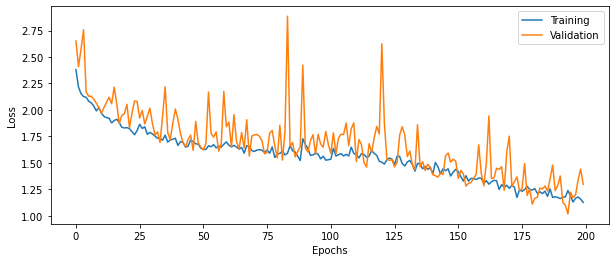

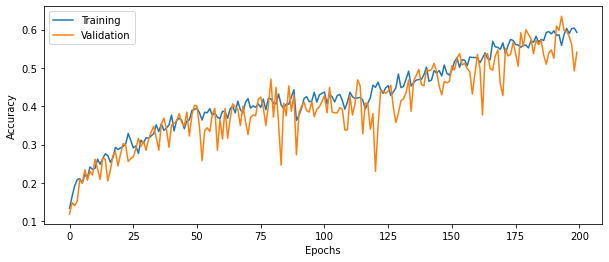

In [69]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [70]:
# Find misclassified images
y_pred = model6.predict_classes(Xtest)
y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

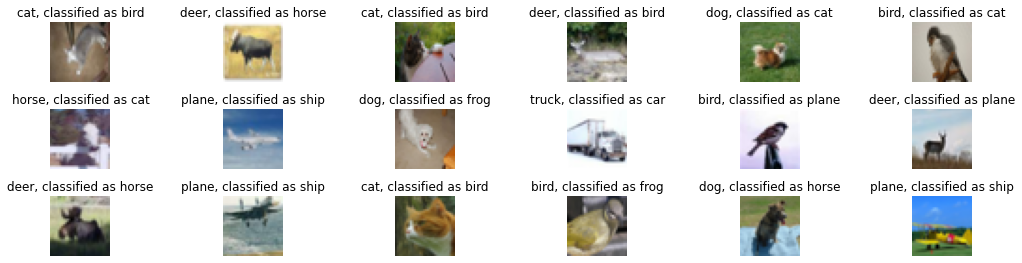

In [71]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 27: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

**Answer:**

No,The input of CNN is size 32 x 32.We can not feed an image of differebt size to network.

Question 28: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

**Answer:**

 It is not possible to directly use images of any sizes. It is because when we define a CNN architecture, we set the number of layers according to  the input size. Without having a fixed input shape, we cannot define architecture of the CNN model. It is therefore necessary to convert all the images to same size.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 29: How many convolutional layers does ResNet50 have? 

53 convolutional layer.

Question 30: How many trainable parameters does the ResNet50 network have? 

 25,583,592
 
Question 31: What is the size of the images that ResNet50 expects as input?

(224, 224, 3)

Question 32: Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.

the number of trainable param is  25,583,592 and it is super time-consuming to calculate the second derivatives.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in keras.preprocessing

`image.img_to_array` in keras.preprocessing

`ResNet50` in keras.applications.resnet50

`preprocess_input` in keras.applications.resnet50

`decode_predictions` in keras.applications.resnet50

`expand_dims` in numpy


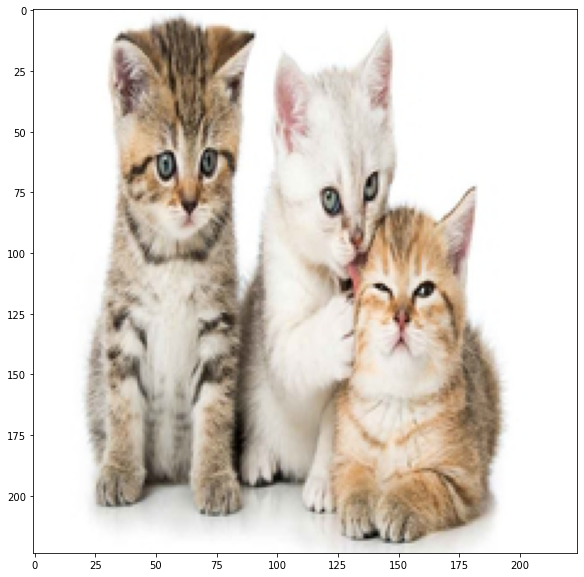

Predicted-category: [('n02123045', 'tabby', 0.44377342)]


In [12]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model7 = ResNet50()

img_path = 'catR1.jpg'
img1 = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img1)
ax.imshow(img_array / 255.) 
plt.show()

print('Predicted-category:', decode_predictions(preds, top=1)[0])

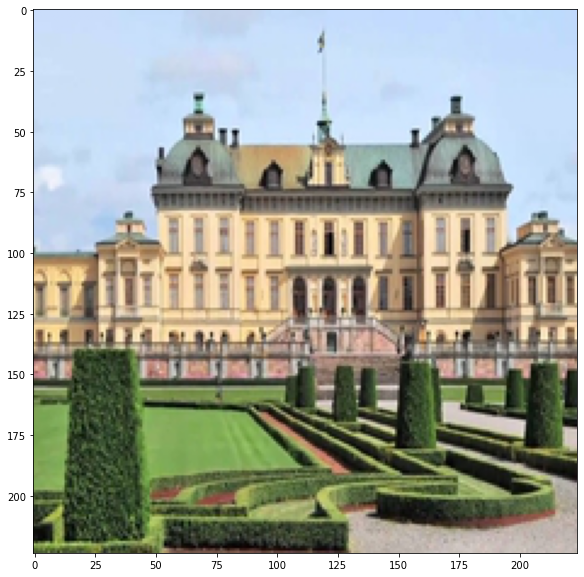

Predicted-category: [('n03877845', 'palace', 0.95554966)]


In [11]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model7 = ResNet50()

img_path = 'sweden.jpg'
img1 = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img1)
ax.imshow(img_array / 255.) 
plt.show()

print('Predicted-category:', decode_predictions(preds, top=1)[0])

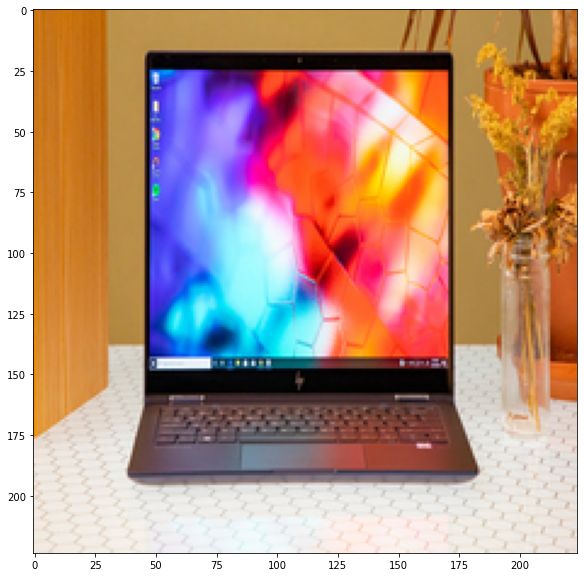

Predicted-category: [('n03832673', 'notebook', 0.7611602)]


In [10]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model7 = ResNet50()

img_path = 'laptop.jpg'
img1 = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img1)
ax.imshow(img_array / 255.) 
plt.show()

print('Predicted-category:', decode_predictions(preds, top=1)[0])

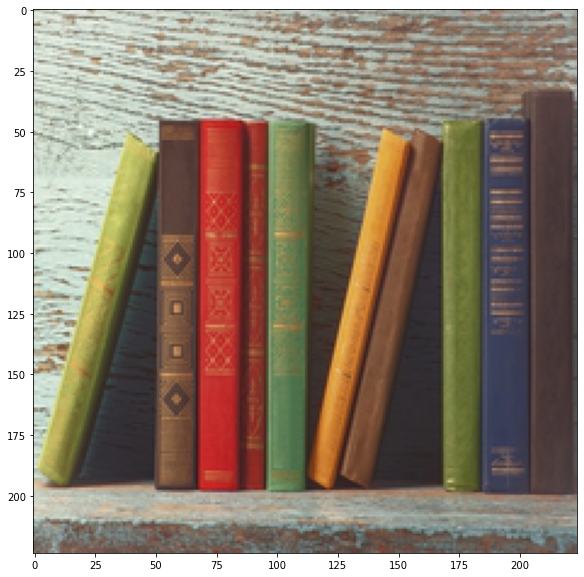

Predicted-category: [('n02871525', 'bookshop', 0.5316664)]


In [3]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model7 = ResNet50()

img_path = 'book.jpg'
img1 = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img1)
ax.imshow(img_array / 255.) 
plt.show()

print('Predicted-category:', decode_predictions(preds, top=1)[0])

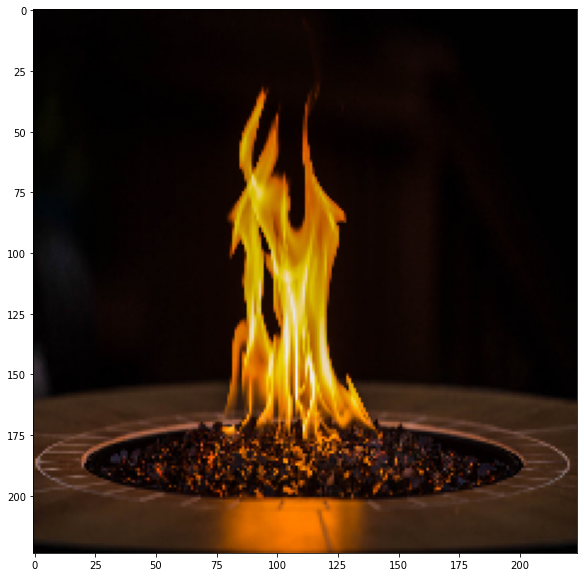

Predicted: [('n03729826', 'matchstick', 0.32555637)]


In [4]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model7 = ResNet50()

img_path = 'fire.jpg'
img1 = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img1)
ax.imshow(img_array / 255.) 
plt.show()

print('Predicted:', decode_predictions(preds, top=1)[0])

In [8]:
model7.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________